In [1]:
# 데이터 전처리
import pycaret
import pandas as pd
import numpy as np


train = pd.read_csv('./타이타닉/train.csv')
test = pd.read_csv('./타이타닉/test.csv')
submission = pd.read_csv('./타이타닉/submission.csv')

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)
train.columns #확인

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [3]:
gender_mapper = {'male': 0, 'female': 1} 
train['Sex'].replace(gender_mapper, inplace=True)
train['Sex'].head() #확인

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [4]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0]) 

# 명칭이 존재하는 경우 0, 아닐 경우 1
train['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in train['Title']]

train = train.rename(columns={'Title': 'Title_Unusual'})
train.drop('Name', axis=1, inplace=True)

train['Title_Unusual'].head() #확인

0    0
1    0
2    0
3    0
4    0
Name: Title_Unusual, dtype: int64

In [5]:
train['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in train['Cabin']] 
train.drop('Cabin', axis=1, inplace=True)

train['Cabin_Known'].head() #확인

0    0
1    1
2    0
3    1
4    0
Name: Cabin_Known, dtype: int64

In [6]:
emb_dummies = pd.get_dummies(train['Embarked'], drop_first=True, prefix='Embarked') 
train = pd.concat([train, emb_dummies], axis=1) 
train.drop('Embarked', axis=1, inplace=True) 

train.head() #확인

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1


In [7]:
train['Age'] = train['Age'].fillna(int(train['Age'].mean()))
train['Age'].head() #확인

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [14]:
from pycaret.classification import * 

#Data Type 직접 정의하기
clf = setup(train, target='Survived', session_id=42)

,Description,Value
0,session_id,42
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 11)"
5,Missing Values,0
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,0
9,High Cardinality Features,0


KeyError: 'dashboard_logger'

In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8331,0.8570,0.6882,0.8363,0.7525,0.6287,0.6374,0.0150
lr,Logistic Regression,0.8282,0.8515,0.7274,0.7922,0.7575,0.6251,0.6271,0.2990
ridge,Ridge Classifier,0.8218,0.0000,0.7275,0.7763,0.7505,0.6123,0.6136,0.0030
lda,Linear Discriminant Analysis,0.8186,0.8526,0.7275,0.7696,0.7472,0.6061,0.6074,0.0030
lightgbm,Light Gradient Boosting Machine,0.8123,0.8534,0.7060,0.7698,0.7347,0.5902,0.5932,0.0100
ada,Ada Boost Classifier,0.8105,0.8395,0.7406,0.7471,0.7427,0.5929,0.5940,0.0130
rf,Random Forest Classifier,0.8010,0.8441,0.7100,0.7480,0.7249,0.5697,0.5732,0.0380
et,Extra Trees Classifier,0.7850,0.8183,0.6971,0.7182,0.7044,0.5361,0.5390,0.0350
dt,Decision Tree Classifier,0.7786,0.7612,0.7100,0.7092,0.7044,0.5283,0.5331,0.0030
knn,K Neighbors Classifier,0.7094,0.7080,0.5286,0.6249,0.5681,0.3539,0.3589,0.0070


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
model_gbc = create_model('gbc')

NameError: name 'GradientBoostingClassifier' is not defined

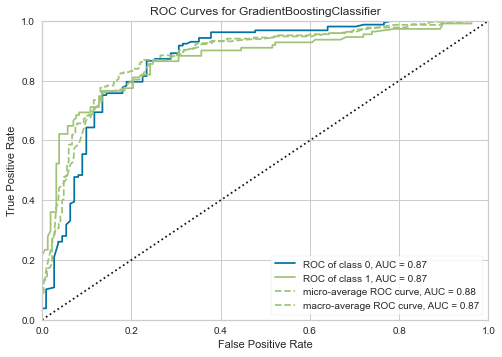

In [21]:
plot_model(model_gbc)

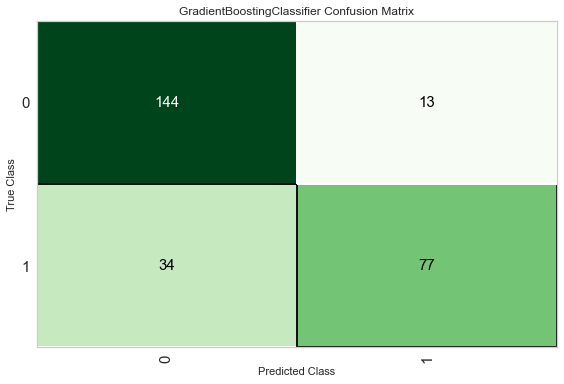

In [22]:
plot_model(estimator = model_gbc, plot = 'confusion_matrix')

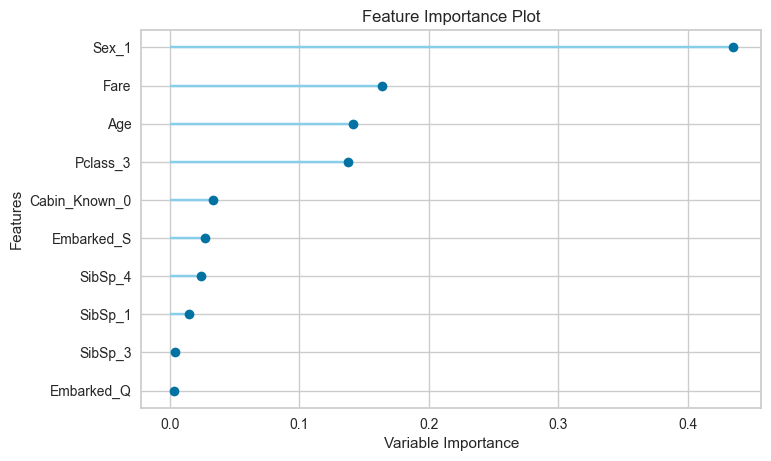

In [23]:
plot_model(estimator = model_gbc, plot = 'feature')

In [24]:
#필요없는 속성을 지운다. Ticket과 PassengerId는 삭제한다.
test.drop(['Ticket', 'PassengerId'], axis=1, inplace=True) 

#성별 속성의 값을 male = 0, female = 1 로 수정한다.
gender_mapper = {'male': 0, 'female': 1} 
test['Sex'].replace(gender_mapper, inplace=True) 

#승객 이름에 지위, 직업, 명칭 등 특별한 정보가 붙는지 확인한다.
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0]) 
test['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in test['Title']] 
test = test.rename(columns={'Title': 'Title_Unusual'}) 
test.drop('Name', axis=1, inplace=True) 

#선실의 정보도 새로운 속성에 저장한다.
test['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in test['Cabin']] 
test.drop('Cabin', axis=1, inplace=True) 

#승선지에 관한 가변수 생성 - dummy variables
emb_dummies = pd.get_dummies(test['Embarked'], drop_first=True, prefix='Embarked') 
test = pd.concat([test, emb_dummies], axis=1) 
test.drop('Embarked', axis=1, inplace=True) 

#비어있는 나이 값은 평균으로 채운다.
test['Age'] = test['Age'].fillna(int(test['Age'].mean()))

test.head() #확인

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,0,1
2,2,0,62.0,0,0,9.6875,0,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,0,1


In [25]:
#Finalize model_cat
gbc_final = finalize_model(model_gbc)

#Predict - 최종모델로 예측 진행!
predict_gbc = predict_model(gbc_final, test)

In [26]:
ID_list = pd.read_csv(r'./타이타닉/test.csv')['PassengerId']
predict_list = [predict_gbc]
name = ['gbc']

def submission_csv(predict_list, name):
    
    for i in range(len(predict_list)):
        
        submission = pd.DataFrame({
            "PassengerId": ID_list,
            "Survived": predict_list[i]['Label']
        })
    
        submission.to_csv('submission_'+name[i]+'.csv', index=False)
    
submission_csv(predict_list,name)